In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
#data source
hemo = pd.read_csv('/content/drive/My Drive/Projet_AVC/hemorrhage_diagnosis.csv')

#regrouper toutes les images dans des vecteurs X_brain et y_brain, X_bone et y_bone
X_brain = []
y_brain= []
X_bone= []
y_bone= []
X_mask = []
y_intraventricular = []
y_intraparenchymal = []
y_subarachnoid = []
y_epidural = []
y_subdural = []

for index, row in hemo.iterrows():
    
    slice_num = str(row.SliceNumber)
    
    if (row['Fracture_Yes_No'] == 1):
        y_bone.append(1)
    else:
        y_bone.append(0)
    
    if row['PatientNumber'] < 100:
        pt_number = '0'+ str(row['PatientNumber'])
    else:
        pt_number = str(row['PatientNumber'])
    
    if (row['No_Hemorrhage'] == 0):
        y_brain.append(1)
        file_mask = '/content/drive/My Drive/Projet_AVC/Patients_CT/'+ pt_number + '/brain/' + slice_num +'_HGE_Seg.jpg'
        img_mask = cv2.imread(file_mask, cv2.IMREAD_GRAYSCALE)
        X_mask.append(img_mask)
    else:
        y_brain.append(0)
        img_mask = np.zeros((650,650), np.uint8)
        X_mask.append(img_mask)
        
    # create y for each type of hemorrhage
    if (row.Intraventricular == 1):
        y_intraventricular.append(1)
    else:
        y_intraventricular.append(0)
    
    if (row.Intraparenchymal == 1):
        y_intraparenchymal.append(1)
    else:
        y_intraparenchymal.append(0)
    
    if (row.Subarachnoid == 1):
        y_subarachnoid.append(1)
    else:
        y_subarachnoid.append(0)
        
    if (row.Epidural == 1):
        y_epidural.append(1)
    else:
        y_epidural.append(0)
        
    if (row.Subdural == 1):
        y_subdural.append(1)
    else:
        y_subdural.append(0)
        
    file_brain = '/content/drive/My Drive/Projet_AVC/Patients_CT/'+ pt_number + '/brain/' + slice_num +'.jpg'
    file_bone = '/content/drive/My Drive/Projet_AVC/Patients_CT/'+ pt_number + '/bone/' + slice_num +'.jpg'
    img_brain = cv2.imread(file_brain)
    img_bone = cv2.imread(file_bone)
    X_brain.append(img_brain)
    X_bone.append(img_bone)
    
X_brain = np.array(X_brain)
X_bone = np.array(X_bone)
X_mask = np.array(X_mask)
y_brain = np.array(y_brain)
y_bone = np.array(y_bone)
y_intraventricular = np.array(y_intraventricular)
y_intraparenchymal = np.array(y_intraparenchymal)
y_subarachnoid = np.array(y_subarachnoid)
y_epidural = np.array(y_epidural)
y_subdural = np.array(y_subdural)

#Save in binary data
np.save('/content/drive/My Drive/Colab_outputs/X_brain.npy', X_brain)
np.save('/content/drive/My Drive/Colab_outputs/X_bone.npy', X_bone)
np.save('/content/drive/My Drive/Colab_outputs/X_mask.npy', X_mask)
np.save('/content/drive/My Drive/Colab_outputs/y_brain.npy', y_brain)
np.save('/content/drive/My Drive/Colab_outputs/y_bone.npy', y_bone)
np.save('/content/drive/My Drive/Colab_outputs/y_intraventricular.npy', y_intraventricular)
np.save('/content/drive/My Drive/Colab_outputs/y_intraparenchymal.npy', y_intraparenchymal)
np.save('/content/drive/My Drive/Colab_outputs/y_subarachnoid.npy', y_subarachnoid)
np.save('/content/drive/My Drive/Colab_outputs/y_epidural.npy', y_epidural)
np.save('/content/drive/My Drive/Colab_outputs/y_subdural.npy', y_subdural)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
#ouverture des array d'image
from numpy import load

np.load.__defaults__=(None, True, True, 'ASCII')

X_brain= load('/content/drive/My Drive/Colab_outputs/X_brain.npy')
#X_bone = load('/content/drive/My Drive/Colab_outputs/X_bone.npy')
#X_mask = load('/content/drive/My Drive/Colab_outputs/X_mask.npy')
y_brain = load('/content/drive/My Drive/Colab_outputs/y_brain.npy')
#y_bone = load('/content/drive/My Drive/Colab_outputs/y_bone.npy')
#y_intraventricular = load('/content/drive/My Drive/Colab_outputs/y_intraventricular.npy')
#y_intraparenchymal = load('/content/drive/My Drive/Colab_outputs/y_intraparenchymal.npy')
#y_subarachnoid = load('/content/drive/My Drive/Colab_outputs/y_subarachnoid.npy')
#y_epidural = load('/content/drive/My Drive/Colab_outputs/y_epidural.npy')
#y_subdural = load('/content/drive/My Drive/Colab_outputs/y_subdural.npy')

np.load.__defaults__=(None, False, True, 'ASCII')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_brain, y_brain, test_size = 0.2, random_state = 20)
X_brain.shape

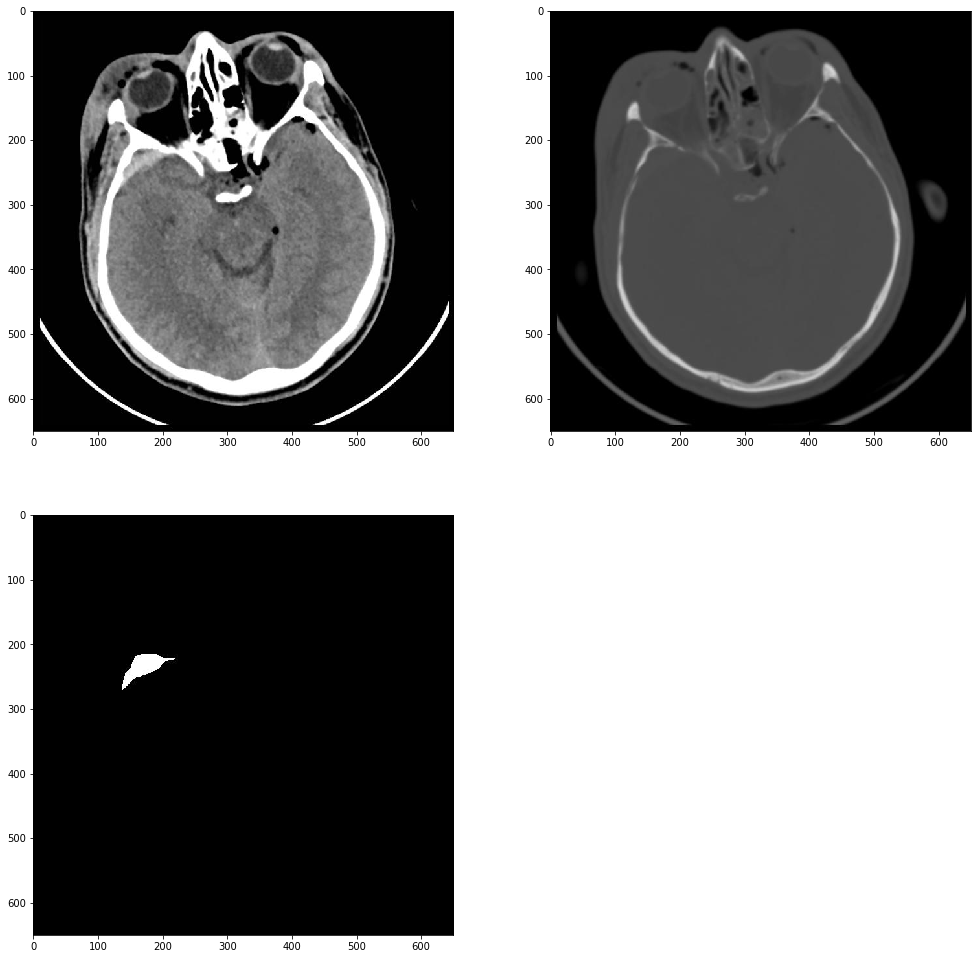

In [ ]:
#function to display img according to patient number and slice number
def display_radio(pt_number, slice_number):
    index = int(np.where((hemo['PatientNumber'] == pt_number) & (hemo['SliceNumber'] == slice_number))[0])
    fig = plt.figure(figsize = (17,17))
    fig.add_subplot(2,2,1)
    plt.imshow(X_brain[index], cmap='gray', interpolation='None')
    fig.add_subplot(2,2,2)
    plt.imshow(X_bone[index], cmap='gray', interpolation='None')
    fig.add_subplot(2,2,3)
    plt.imshow(X_mask[index], cmap='gray', interpolation='None') 
    
display_radio(49, 16)

In [ ]:
hemo = pd.read_csv('/content/drive/My Drive/Projet_AVC/hemorrhage_diagnosis.csv')

def display_img(pt_number, slice_number):

  lines = len(pt_number) // 3
  columns = len(pt_number) // 2

  # affichage des images côte à côte
  fig = plt.figure(figsize = (12,12))

  # set the spacing between subplots
  plt.subplots_adjust(left=0.1,
                      bottom=0.1,
                      right=0.9,
                      top=0.5,
                      wspace=0.3,
                      hspace=0.3)

  for i, patient, slice_num in zip (range(len(pt_number)), pt_number, slice_number): 

      index = int(np.where((hemo['PatientNumber'] == patient) & (hemo['SliceNumber'] == slice_num))[0])

      fig.add_subplot(lines,columns,i+1)
      if (i%2 == 0):
        plt.imshow(X_brain[index], cmap='gray')
        plt.title('Brain image - pt ' + str(patient) + ' - ' + str(slice_num))
      else:
        plt.imshow(X_bone[index], cmap='gray')
        plt.title('Bone image - pt ' + str(patient) + ' - ' + str(slice_num))
      plt.xticks([])
      plt.yticks([])

  plt.show();

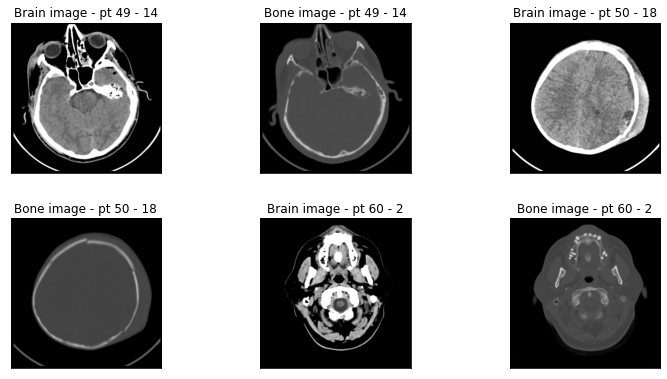

In [ ]:
display_img([49,49,50,50,60,60], [14,14,18,18,2,2])

In [ ]:

def mask (pt_number, slice_number):
  
  index = int(np.where((hemo['PatientNumber'] == pt_number) & (hemo['SliceNumber'] == slice_number))[0])

  # affichage des images côte à côte
  fig = plt.figure(figsize = (12,12))

  fig.add_subplot(1,2,1)
  plt.imshow(X_brain[index], cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.title('Brain image pt ' + str(pt_number) + ' - ' + str(slice_number))

  fig.add_subplot(1,2,2)
  plt.imshow(X_mask[index], cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.title('Brain mask pt ' + str(pt_number) + ' - ' + str(slice_number))

  plt.show();

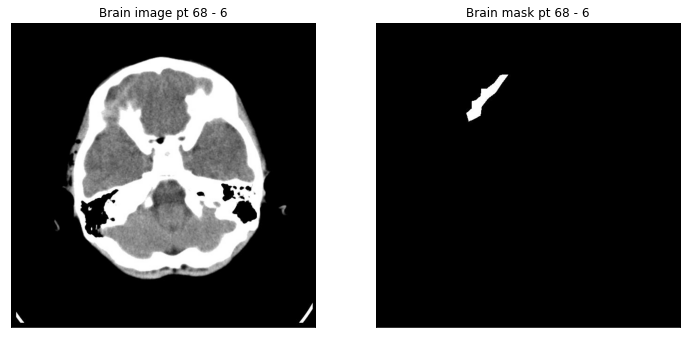

In [ ]:
mask(68,6)

In [ ]:
#hemorrhage vs non hemorrahge

def display_img(slice_nb):    
    # comparaison sur une slice comparable pour chaque patient

    has_hemo = X_brain[y_brain == 1].random.choice(size=5, replace=False)
    no_hemo = X_brain[y_brain == 1].random.choice(size=5, replace=False)
    X_new = pd.concatenate([has_hemo,no_hemo])
    #X_new = analysis.reset_index()
    
    fig = plt.figure(figsize = (17,17))
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)
    
    for index, row in range(len(X_new)):

        fig.add_subplot(5,2,index+1)
        #ajout du 0 pour les chiffres < 100
        if row['PatientNumber'] < 100:
            pt_number = '0'+ str(row['PatientNumber'])
        else:
            pt_number = str(row['PatientNumber'])

        index_x = int(np.where((hemo['PatientNumber'] == pt_number) & (hemo['SliceNumber'] == slice_nb))[0])

        if (row['No_Hemorrhage'] == 0):
            hemorrhage = 'hemorrhage'
        else: 
            hemorrhage = 'no hemorrhage'
        plt.imshow(X_brain[index_x], cmap = 'gray')
        plt.xticks([])
        plt.yticks([])
        title_img = 'Brain image pt ' + pt_number + ' - sl' + str(slice_nb) +' - '+ hemorrhage
        plt.title(title_img)

    plt.show(); 

In [ ]:
#choose the slice
display_img(22)

AttributeError: ignored

In [ ]:
analysis

NameError: ignored

In [ ]:
has_hemo = X_brain[y_brain == 1]
has = np.random.rand(has_hemo.shape[0])
no_hemo = X_brain[y_brain == 0]
X_new = np.concatenate([has_hemo,no_hemo])
X_new

In [ ]:
X_brain[y_brain == 1].random.rand(5,3)

AttributeError: ignored

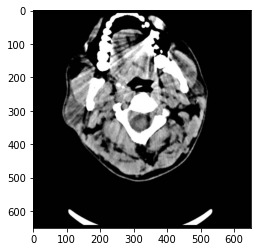

In [ ]:
plt.imshow(X_brain[0], cmap = 'gray')

In [ ]:
X_brain.shape

(2501, 650, 650, 3)